In [1]:
import pandas as pd

# Ouvrir le fichier CSV
df = pd.read_csv('ReArm_C1P44_V1_101_53727.csv')
df1= pd.read_csv('ReArm_C1P44_V1_201_52105.csv')
# Afficher les premières lignes du fichier
print(df.head())
print(df1.head())

   1721419205.0600  -36  284  -232
0     1.721419e+09 -224  -92   -60
1     1.721419e+09 -236  -96   -64
2     1.721419e+09 -240  -96   -72
3     1.721419e+09 -252 -108   -80
4     1.721419e+09 -248 -108   -80
   1721419207.4200  112  232  -96
0     1.721419e+09 -240   20   56
1     1.721419e+09 -248   20   60
2     1.721419e+09 -248   20   56
3     1.721419e+09 -252   20   60
4     1.721419e+09 -252   16   52


In [2]:
noms_colonnes = df.columns
print(f"Les noms des colonnes dans le tableau sont : {noms_colonnes}") 
df.columns = ['date_heure', 'X', 'Y', 'Z']
print(f"Nouveaux noms des colonnes : {df.columns}")


noms_colonnes = df1.columns
print(f"Les noms des colonnes dans le tableau sont : {noms_colonnes}") 
df1.columns = ['date_heure', 'X', 'Y', 'Z']
print(f"Nouveaux noms des colonnes : {df1.columns}")

Les noms des colonnes dans le tableau sont : Index(['1721419205.0600', '-36', '284', '-232'], dtype='object')
Nouveaux noms des colonnes : Index(['date_heure', 'X', 'Y', 'Z'], dtype='object')
Les noms des colonnes dans le tableau sont : Index(['1721419207.4200', '112', '232', '-96'], dtype='object')
Nouveaux noms des colonnes : Index(['date_heure', 'X', 'Y', 'Z'], dtype='object')


In [4]:
print(df1.head())

     date_heure    X   Y   Z
0  1.721419e+09 -240  20  56
1  1.721419e+09 -248  20  60
2  1.721419e+09 -248  20  56
3  1.721419e+09 -252  20  60
4  1.721419e+09 -252  16  52


In [6]:
df['date_heure'] = pd.to_datetime(df['date_heure'], unit='s')
print(df.head())


df1['date_heure'] = pd.to_datetime(df1['date_heure'], unit='s')
print(df1.head())

                     date_heure    X    Y   Z
0 2024-07-19 20:00:05.079999924 -224  -92 -60
1 2024-07-19 20:00:05.099999905 -236  -96 -64
2 2024-07-19 20:00:05.119999886 -240  -96 -72
3 2024-07-19 20:00:05.140000105 -252 -108 -80
4 2024-07-19 20:00:05.160000086 -248 -108 -80
                     date_heure    X   Y   Z
0 2024-07-19 20:00:07.440000057 -240  20  56
1 2024-07-19 20:00:07.460000038 -248  20  60
2 2024-07-19 20:00:07.480000019 -248  20  56
3 2024-07-19 20:00:07.500000000 -252  20  60
4 2024-07-19 20:00:07.519999981 -252  16  52


In [7]:
# Calculer la différence de temps entre les échantillons
time_diffs = df['date_heure'].diff().dropna()

# Calculer la fréquence d'échantillonnage (nombre d'échantillons par seconde)
sampling_frequency = 1 / time_diffs.dt.total_seconds().mean()

print(f"La fréquence d'échantillonnage du bras sain est : {sampling_frequency} Hz")

# Calculer la différence de temps entre les échantillons
time_diffs1 = df1['date_heure'].diff().dropna()

# Calculer la fréquence d'échantillonnage (nombre d'échantillons par seconde)
sampling_frequency1 = 1 / time_diffs1.dt.total_seconds().mean()

print(f"La fréquence d'échantillonnage du bras parétique est : {sampling_frequency1} Hz")

La fréquence d'échantillonnage du bras sain est : 50.60137194831636 Hz
La fréquence d'échantillonnage du bras parétique est : 49.053749648912834 Hz


In [8]:
# Définir la nouvelle fréquence d'échantillonnage pour df1
new_sampling_frequency1 = 50  # en Hz

# Créer une nouvelle série temporelle avec la nouvelle fréquence d'échantillonnage pour df1
new_time_index1 = pd.date_range(start=df1['date_heure'].min(), end=df1['date_heure'].max(), freq=f'{1/new_sampling_frequency1}S')

# Réindexer le DataFrame pour inclure la nouvelle série temporelle pour df1
df1_reindexed = df1.set_index('date_heure').reindex(new_time_index1)

# Interpoler les valeurs manquantes avec une interpolation linéaire pour df1
df1_interpolated = df1_reindexed.interpolate(method='linear')

# Réinitialiser l'index pour avoir 'date_heure' comme colonne pour df1
df1_interpolated.reset_index(inplace=True)
df1_interpolated.rename(columns={'index': 'date_heure'}, inplace=True)

print(df1_interpolated.head())
new_sampling_frequency = 50  # en Hz

# Créer une nouvelle série temporelle avec la nouvelle fréquence d'échantillonnage
new_time_index = pd.date_range(start=df['date_heure'].min(), end=df['date_heure'].max(), freq=f'{1/new_sampling_frequency}S')

# Réindexer le DataFrame pour inclure la nouvelle série temporelle
df_reindexed = df.set_index('date_heure').reindex(new_time_index)

# Interpoler les valeurs manquantes avec une interpolation linéaire
df_interpolated = df_reindexed.interpolate(method='linear')

# Réinitialiser l'index pour avoir 'date_heure' comme colonne
df_interpolated.reset_index(inplace=True)
df_interpolated.rename(columns={'index': 'date_heure'}, inplace=True)

print(df_interpolated.head())

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_4195/301703647.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_time_index1 = pd.date_range(start=df1['date_heure'].min(), end=df1['date_heure'].max(), freq=f'{1/new_sampling_frequency1}S')


                     date_heure      X      Y     Z
0 2024-07-19 20:00:07.440000057 -240.0  20.00  56.0
1 2024-07-19 20:00:07.460000057 -240.0  20.32  56.0
2 2024-07-19 20:00:07.480000057 -240.0  20.64  56.0
3 2024-07-19 20:00:07.500000057 -240.0  20.96  56.0
4 2024-07-19 20:00:07.520000057 -240.0  21.28  56.0


/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_4195/301703647.py:21: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_time_index = pd.date_range(start=df['date_heure'].min(), end=df['date_heure'].max(), freq=f'{1/new_sampling_frequency}S')


                     date_heure      X      Y      Z
0 2024-07-19 20:00:05.079999924 -224.0 -92.00 -60.00
1 2024-07-19 20:00:05.099999924 -224.8 -92.32 -60.16
2 2024-07-19 20:00:05.119999924 -225.6 -92.64 -60.32
3 2024-07-19 20:00:05.139999924 -226.4 -92.96 -60.48
4 2024-07-19 20:00:05.159999924 -227.2 -93.28 -60.64


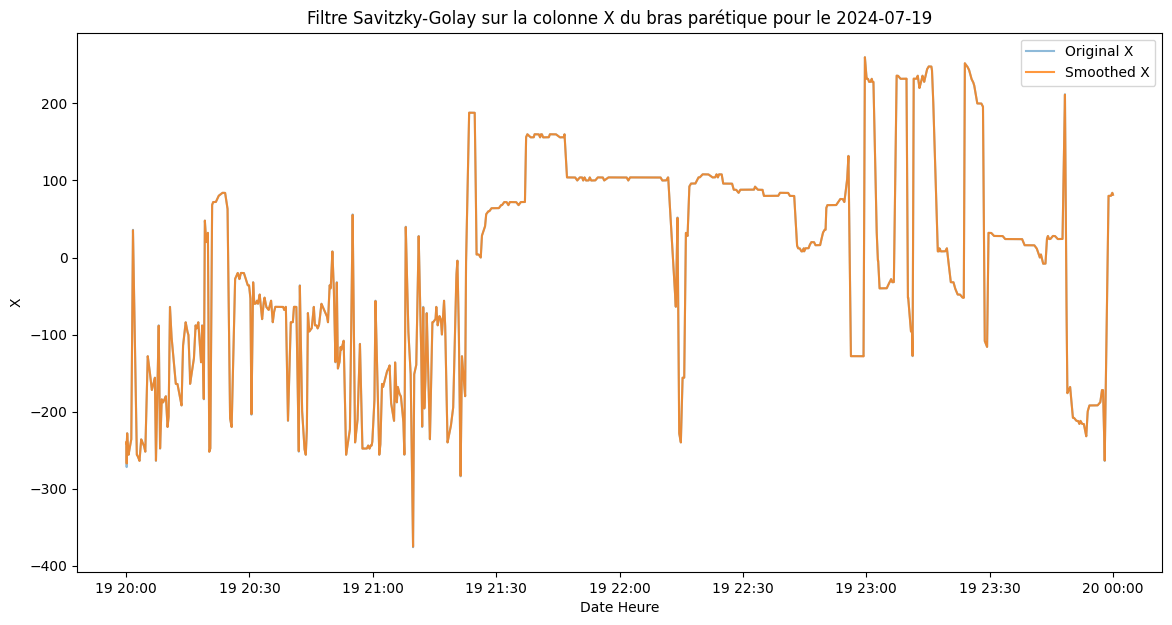

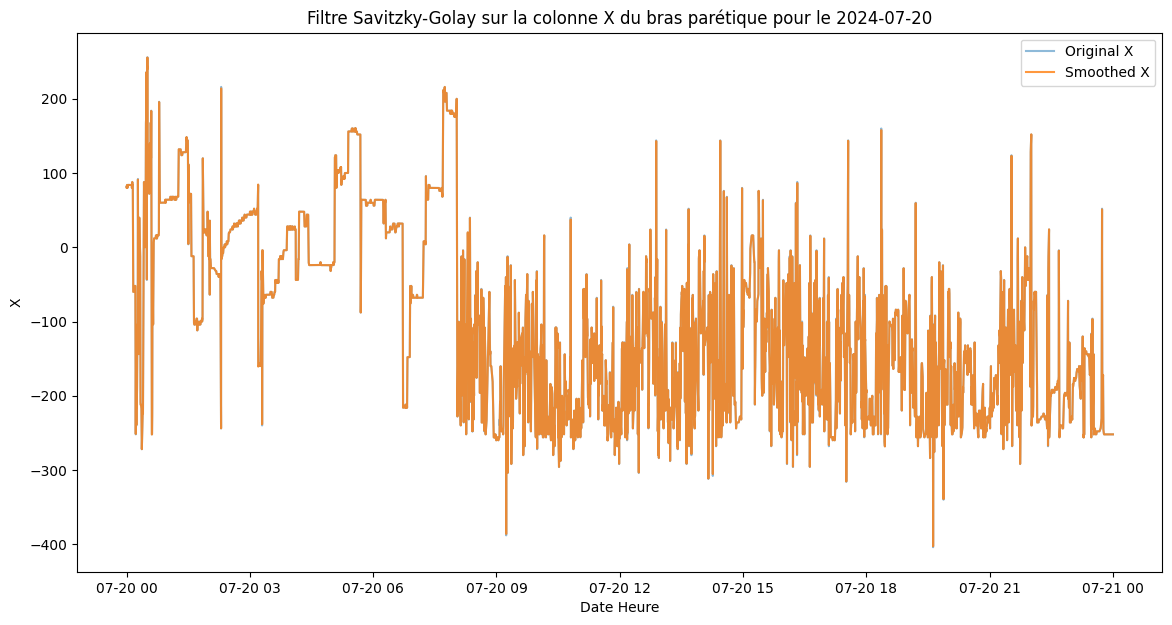

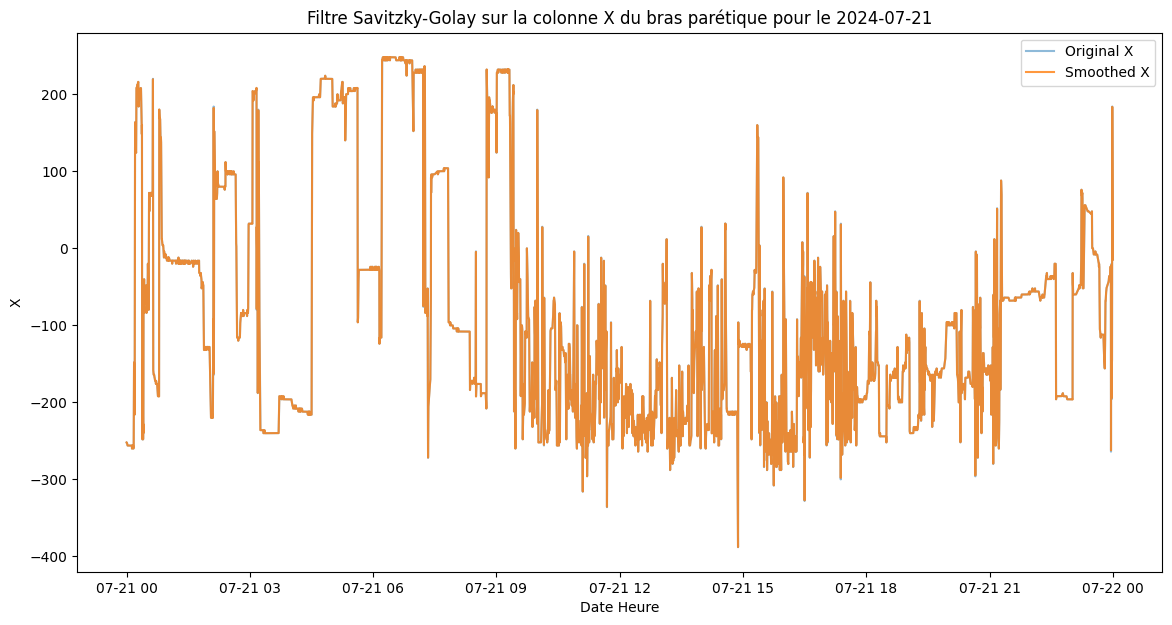

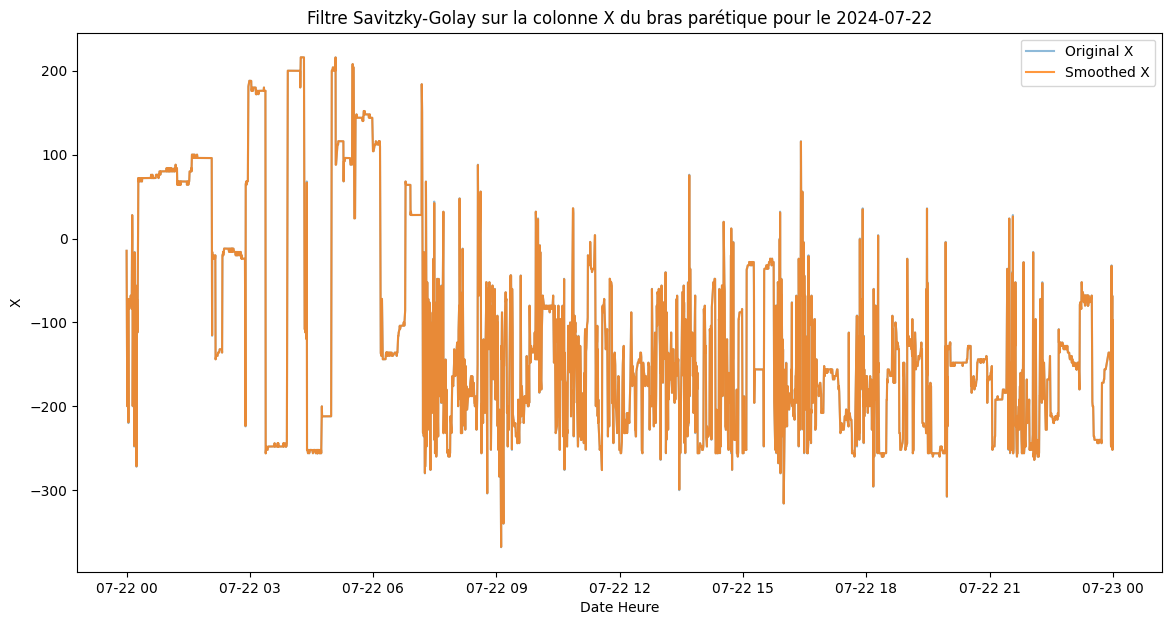

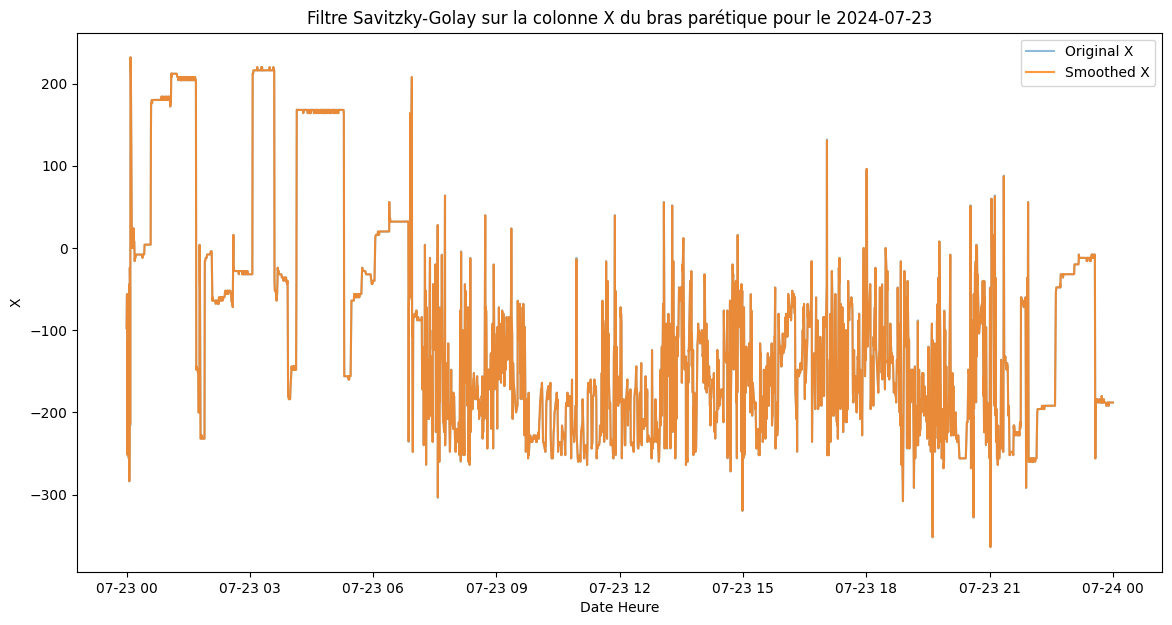

/Users/leoolivier/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


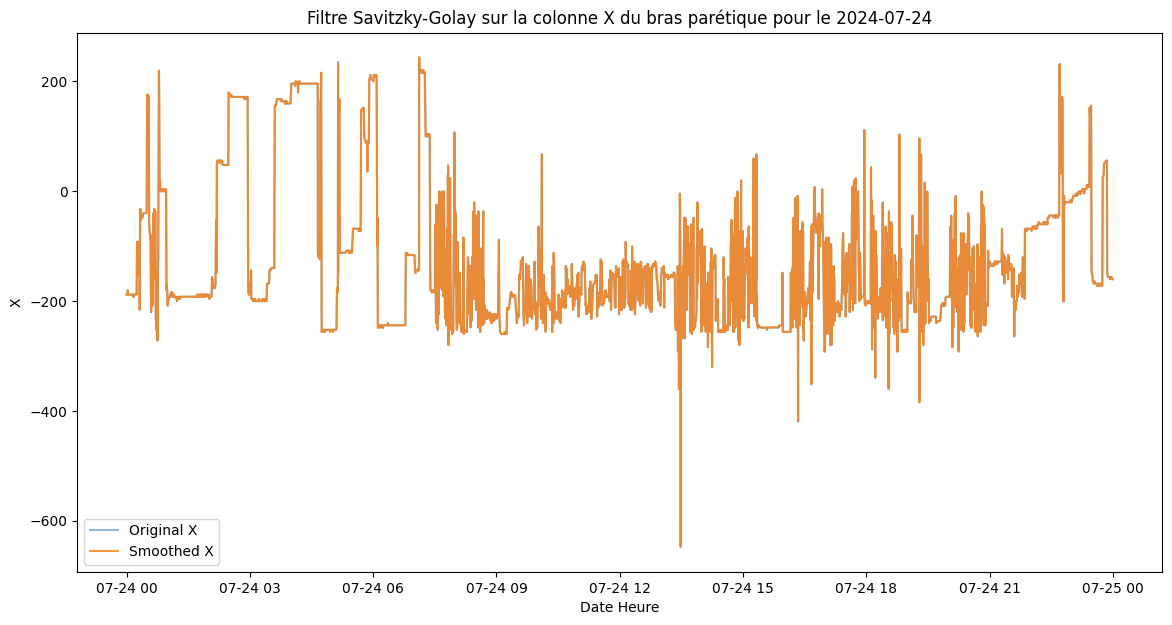

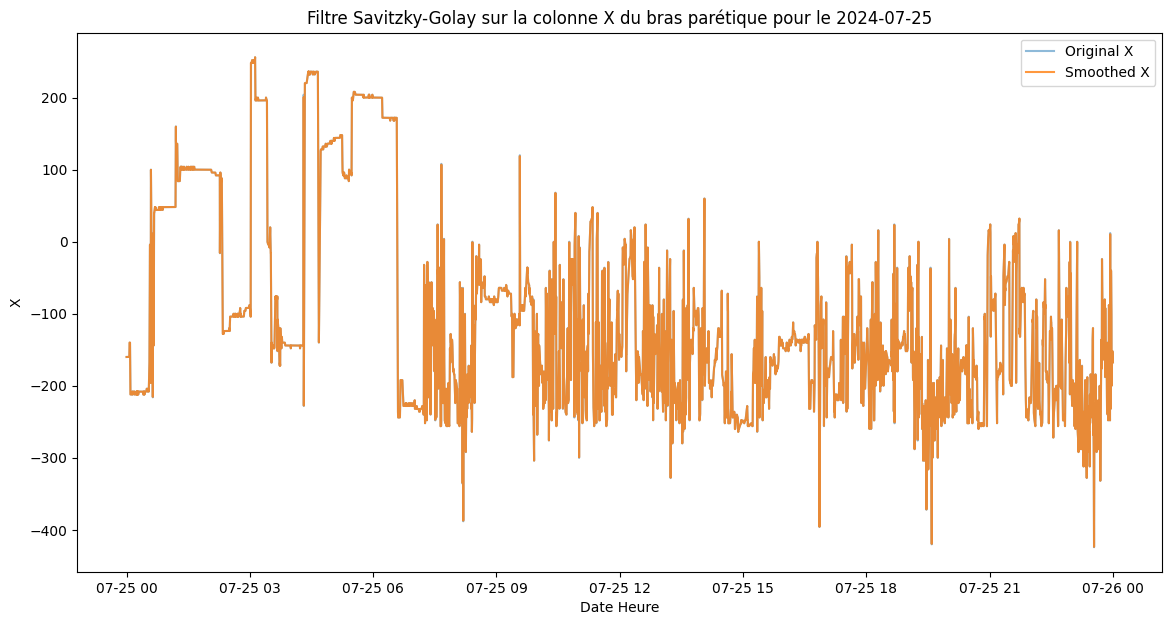

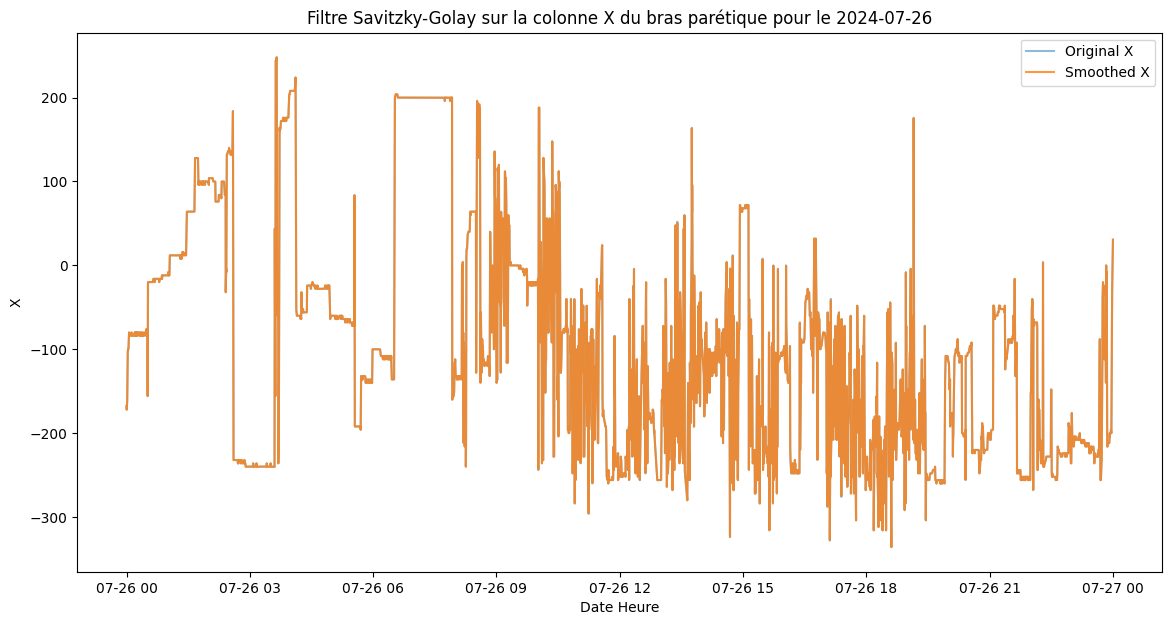

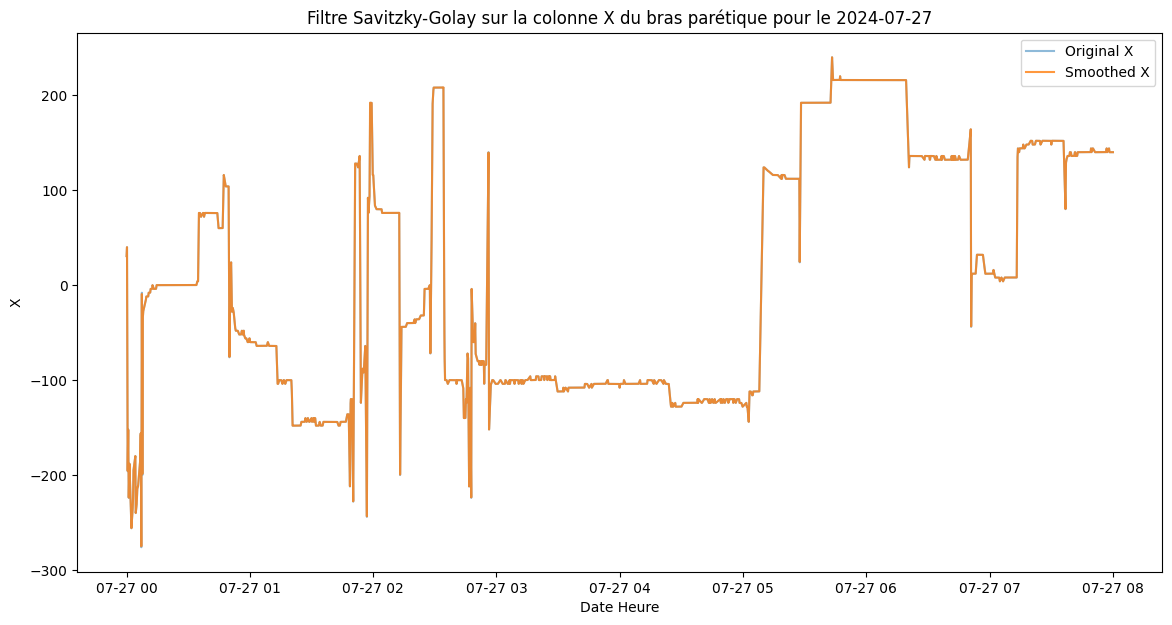

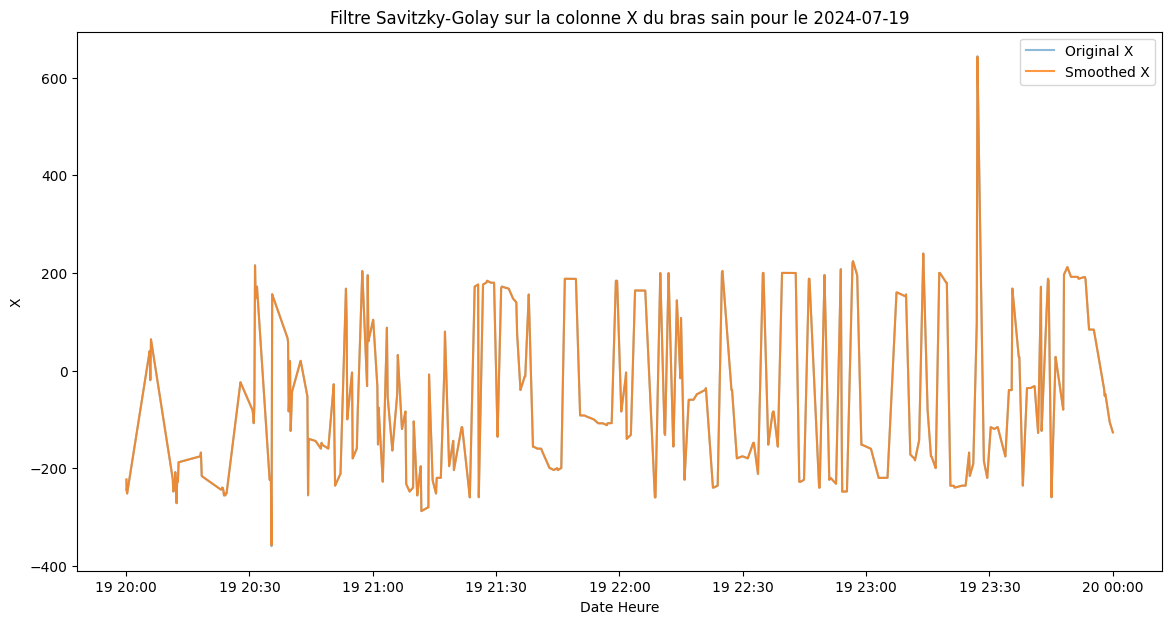

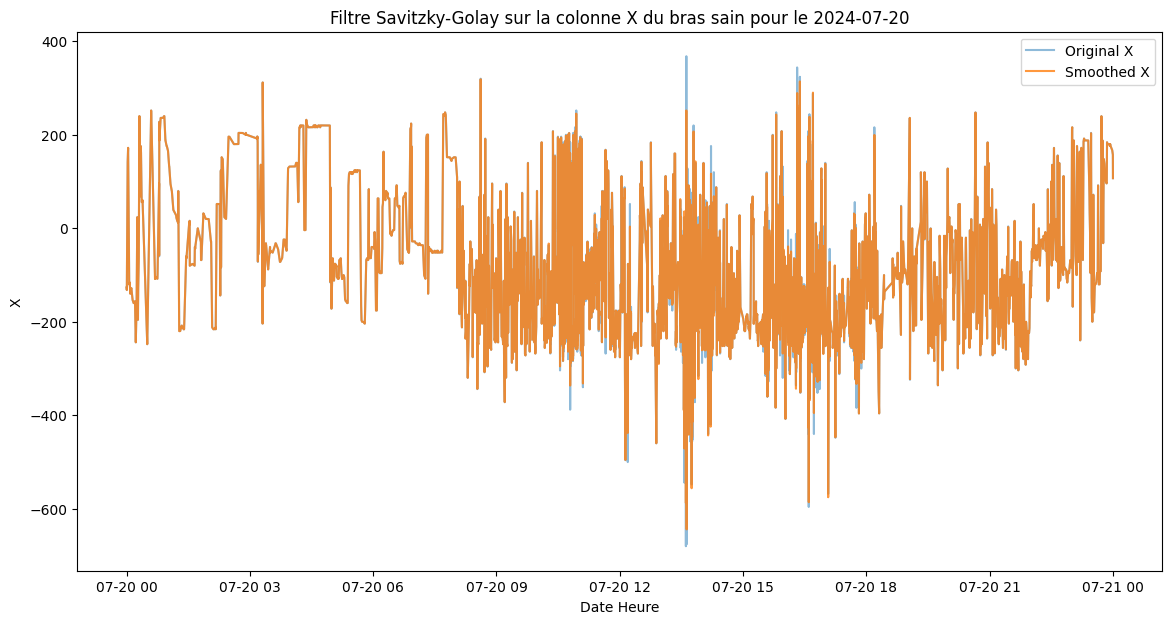

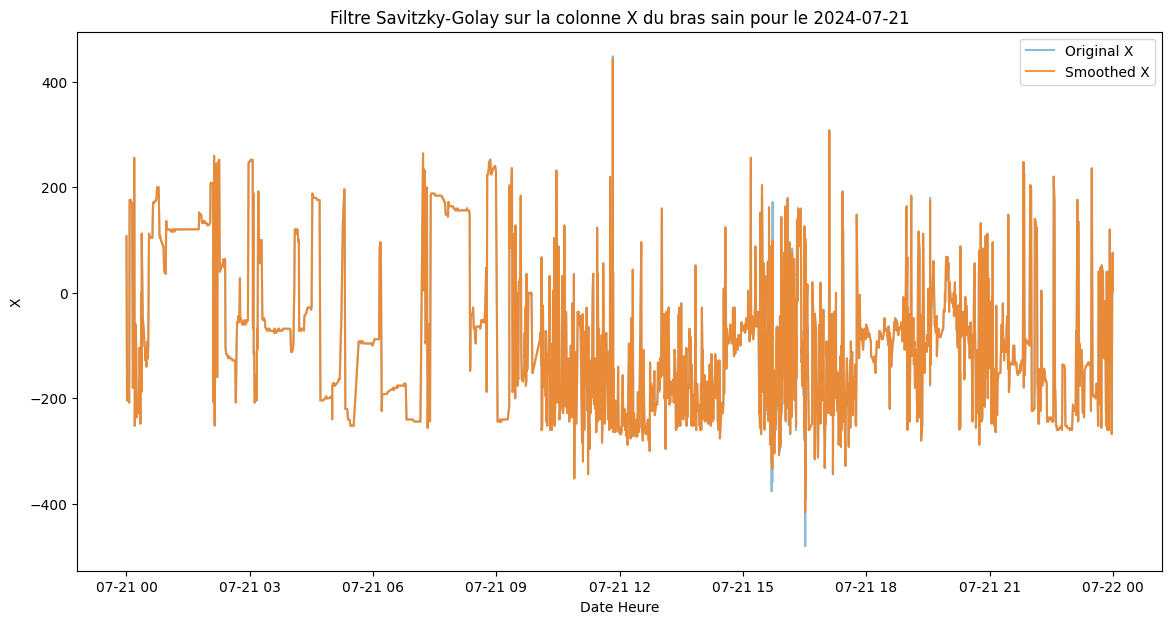

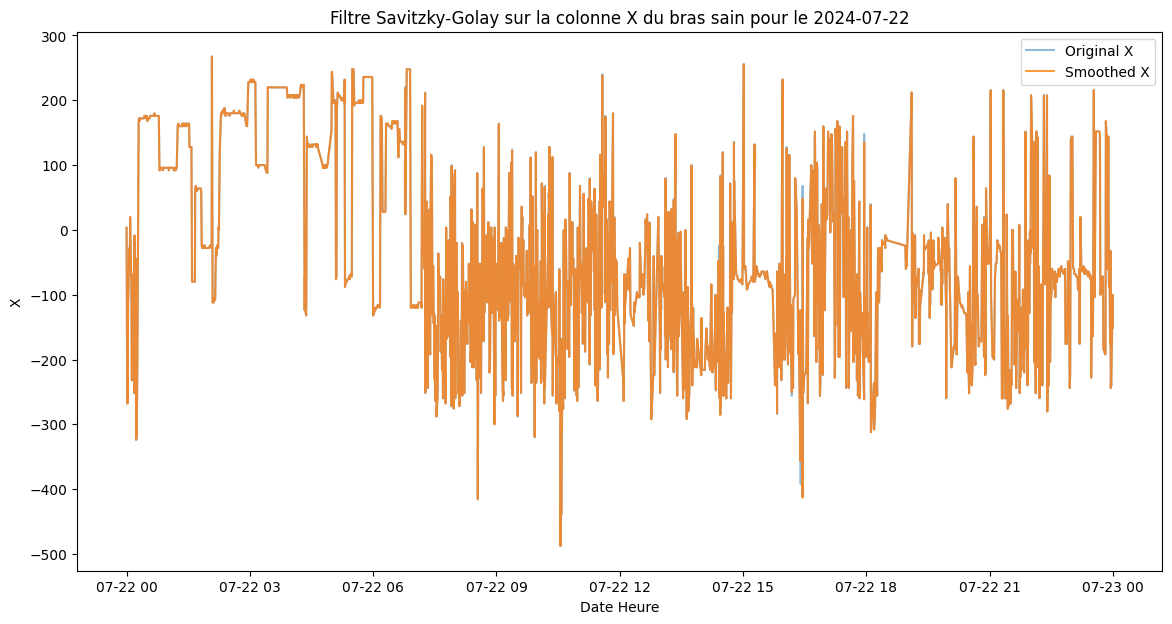

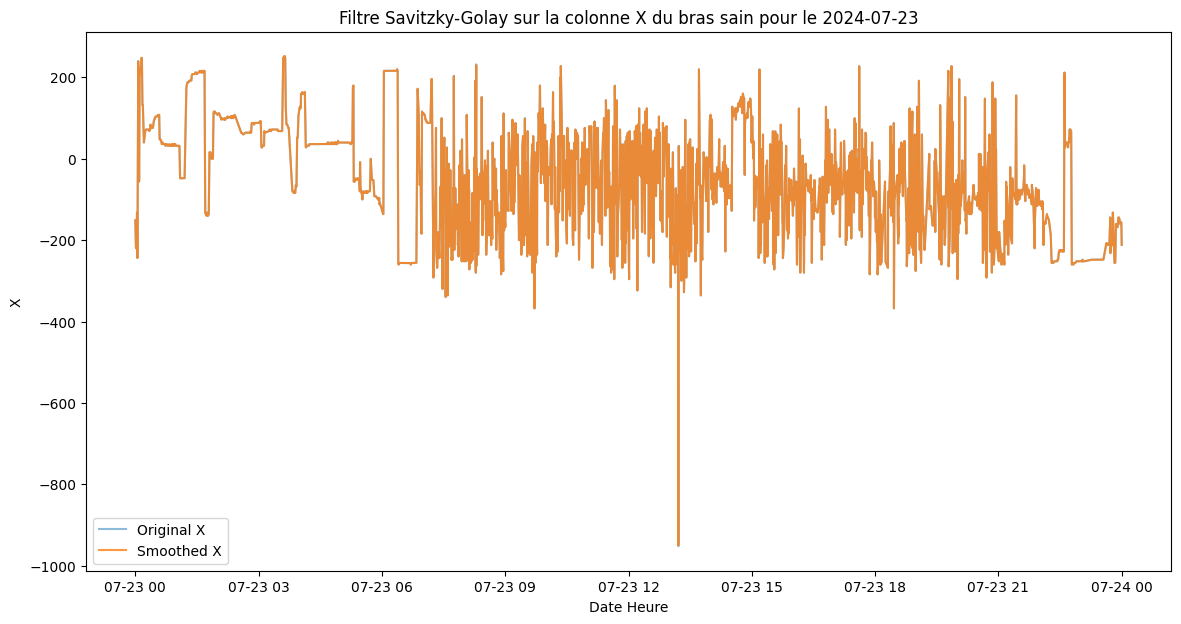

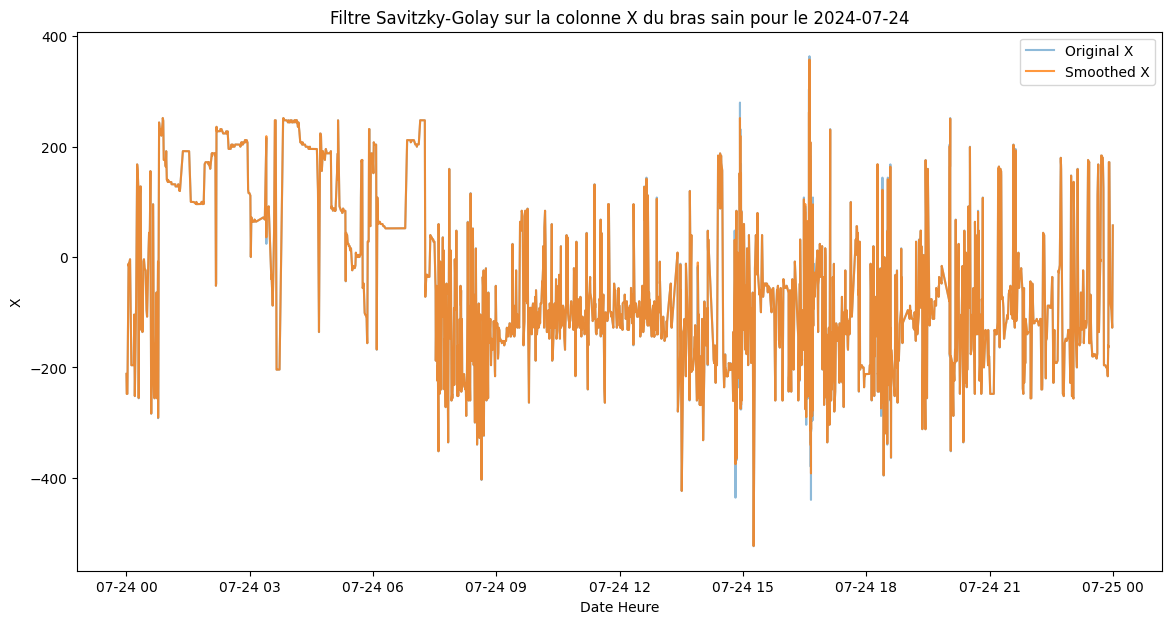

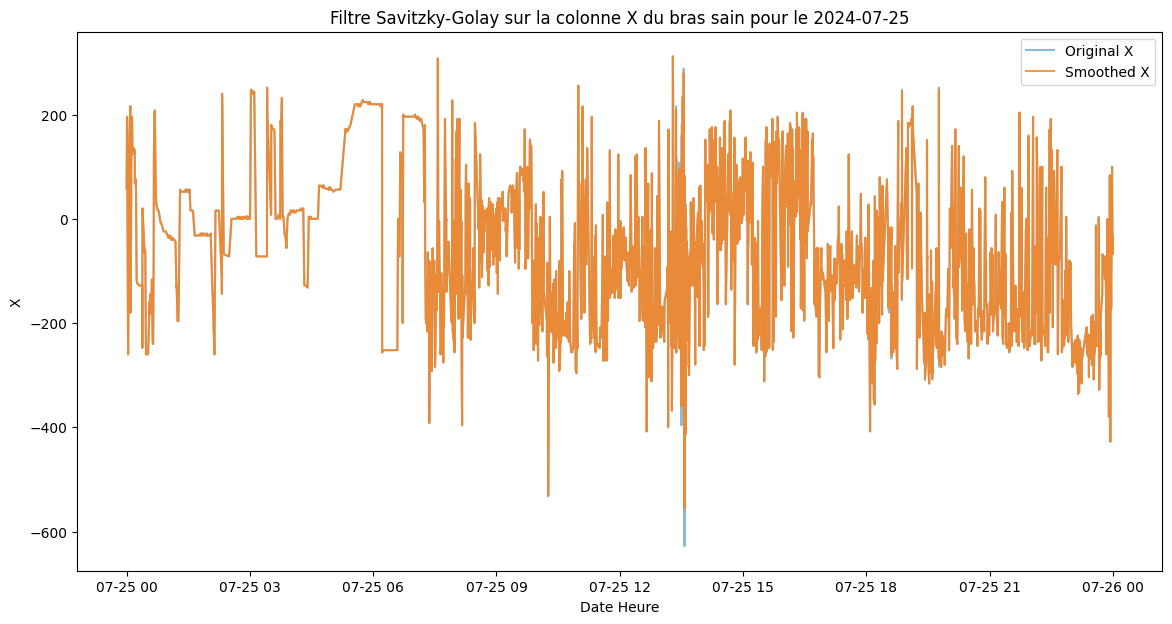

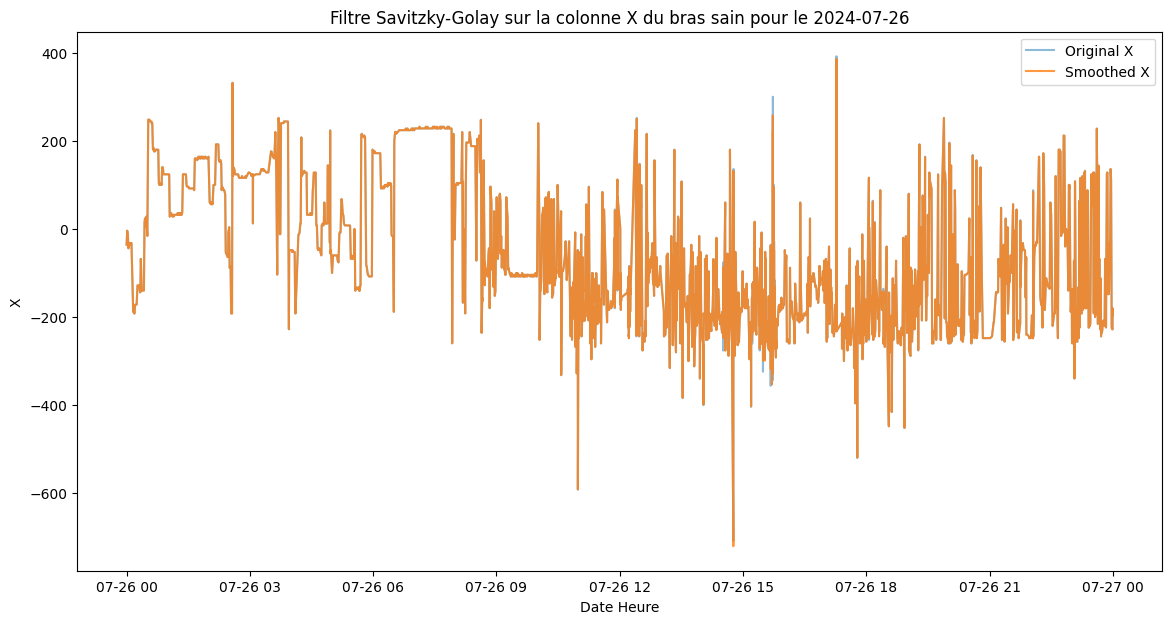

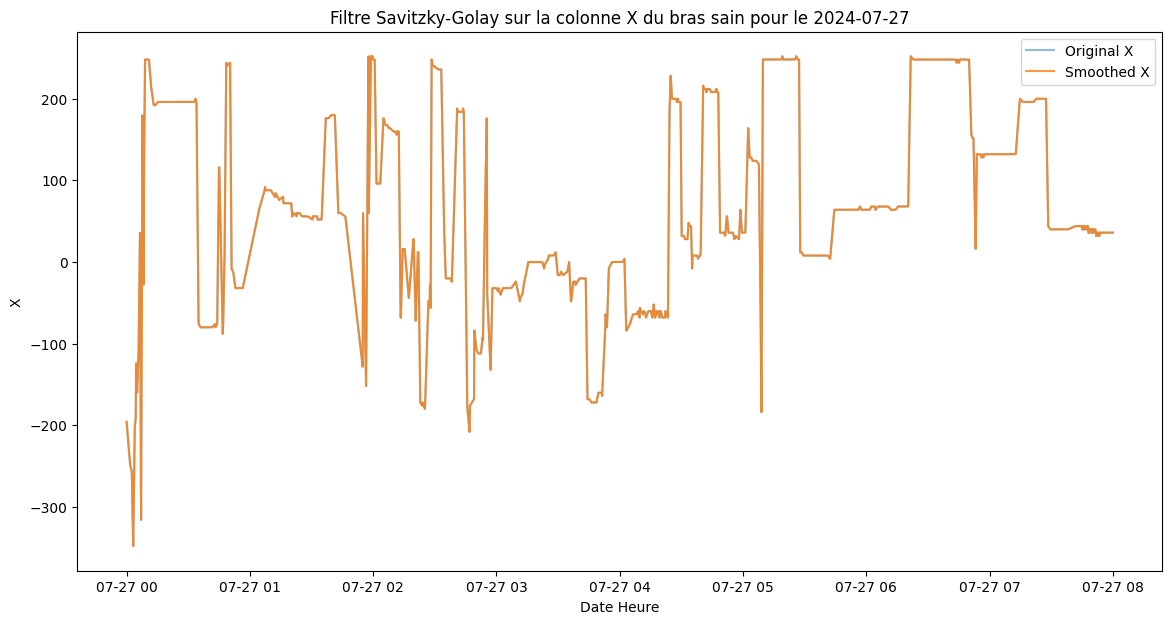

In [10]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt 
# Appliquer le filtre Savitzky-Golay sur les colonnes X, Y et Z pour df1_interpolated
df1_interpolated['X_smooth'] = savgol_filter(df1_interpolated['X'], window_length=51, polyorder=3)
df1_interpolated['Y_smooth'] = savgol_filter(df1_interpolated['Y'], window_length=51, polyorder=3)
df1_interpolated['Z_smooth'] = savgol_filter(df1_interpolated['Z'], window_length=51, polyorder=3)

# Vérifier si 'date_heure' est dans les colonnes de df1_interpolated
if 'date_heure' not in df1_interpolated.columns:
    df1_interpolated.reset_index(inplace=True)
    df1_interpolated.rename(columns={'index': 'date_heure'}, inplace=True)

# Grouper les données par jour pour df1_interpolated
df1_interpolated['date'] = df1_interpolated['date_heure'].dt.date
grouped1 = df1_interpolated.groupby('date')

# Créer un plot pour chaque jour pour df1_interpolated
for date, group in grouped1:
    plt.figure(figsize=(14, 7))
    plt.plot(group['date_heure'], group['X'], label='Original X', alpha=0.5)
    plt.plot(group['date_heure'], group['X_smooth'], label='Smoothed X', alpha=0.8)
    plt.xlabel('Date Heure')
    plt.ylabel('X')
    plt.title(f'Filtre Savitzky-Golay sur la colonne X du bras parétique pour le {date}')
    plt.legend()
    plt.show()
# Appliquer le filtre Savitzky-Golay sur les colonnes X, Y et Z
df_interpolated['X_smooth'] = savgol_filter(df_interpolated['X'], window_length=51, polyorder=3)
df_interpolated['Y_smooth'] = savgol_filter(df_interpolated['Y'], window_length=51, polyorder=3)
df_interpolated['Z_smooth'] = savgol_filter(df_interpolated['Z'], window_length=51, polyorder=3)

# Vérifier si 'date_heure' est dans les colonnes de df_interpolated
if 'date_heure' not in df_interpolated.columns:
    df_interpolated.reset_index(inplace=True)
    df_interpolated.rename(columns={'index': 'date_heure'}, inplace=True)

# Grouper les données par jour
df_interpolated['date'] = df_interpolated['date_heure'].dt.date
grouped = df_interpolated.groupby('date')

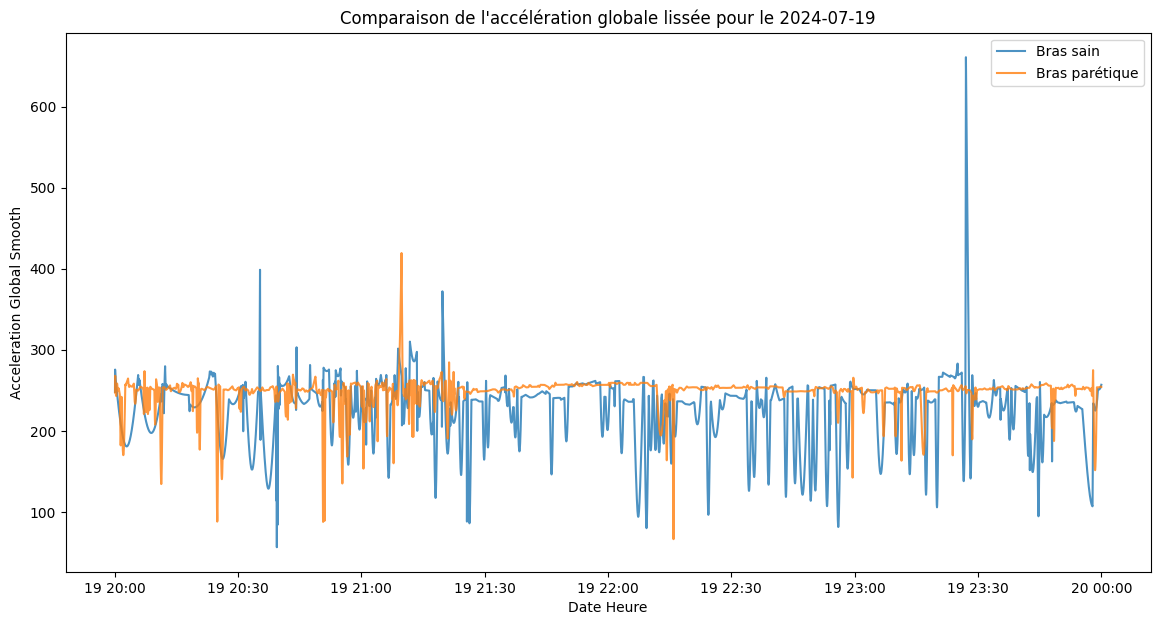

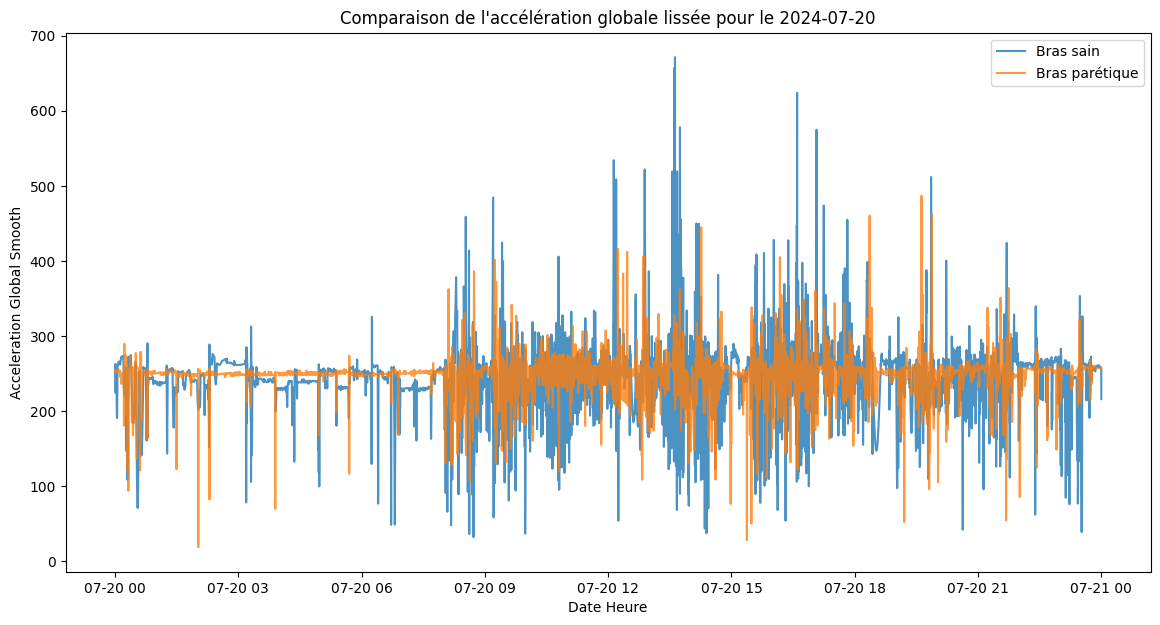

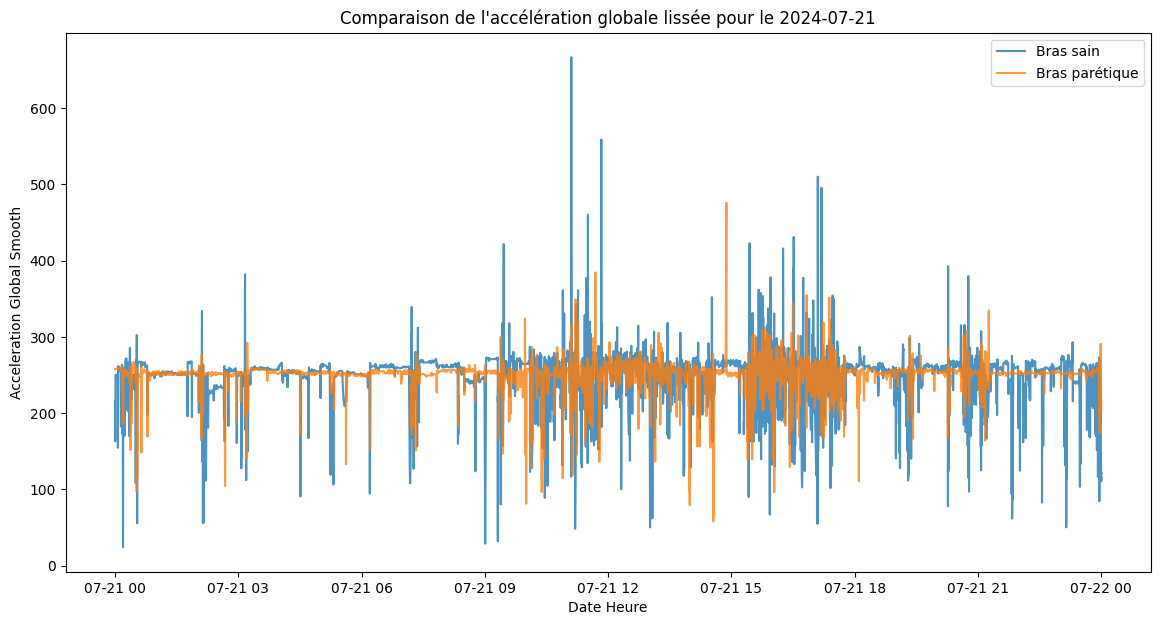

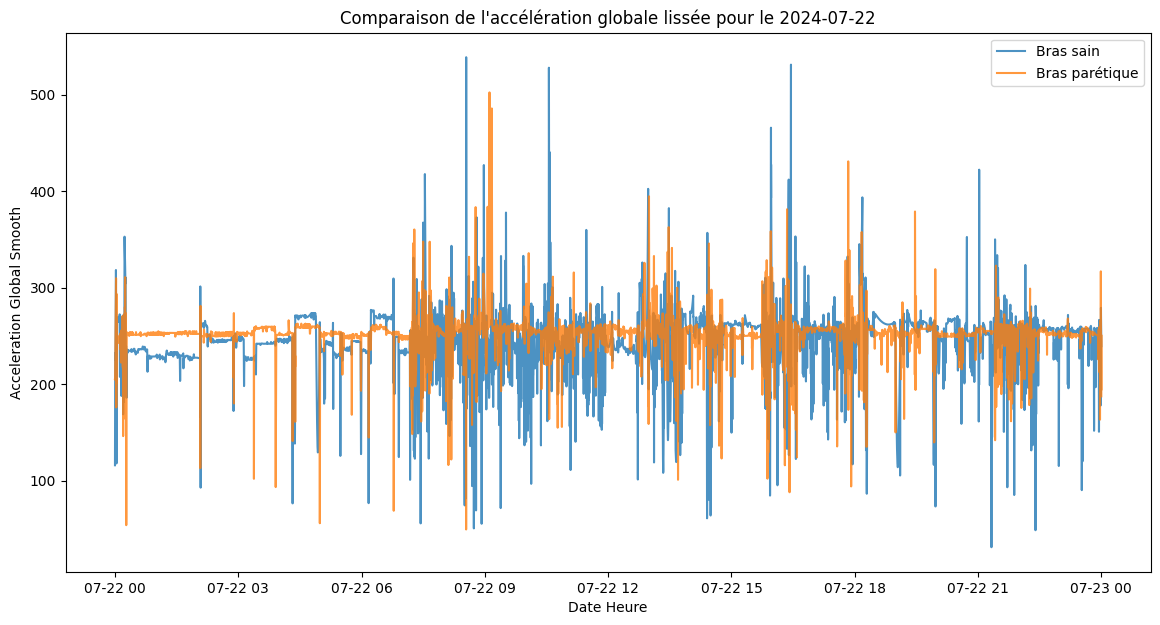

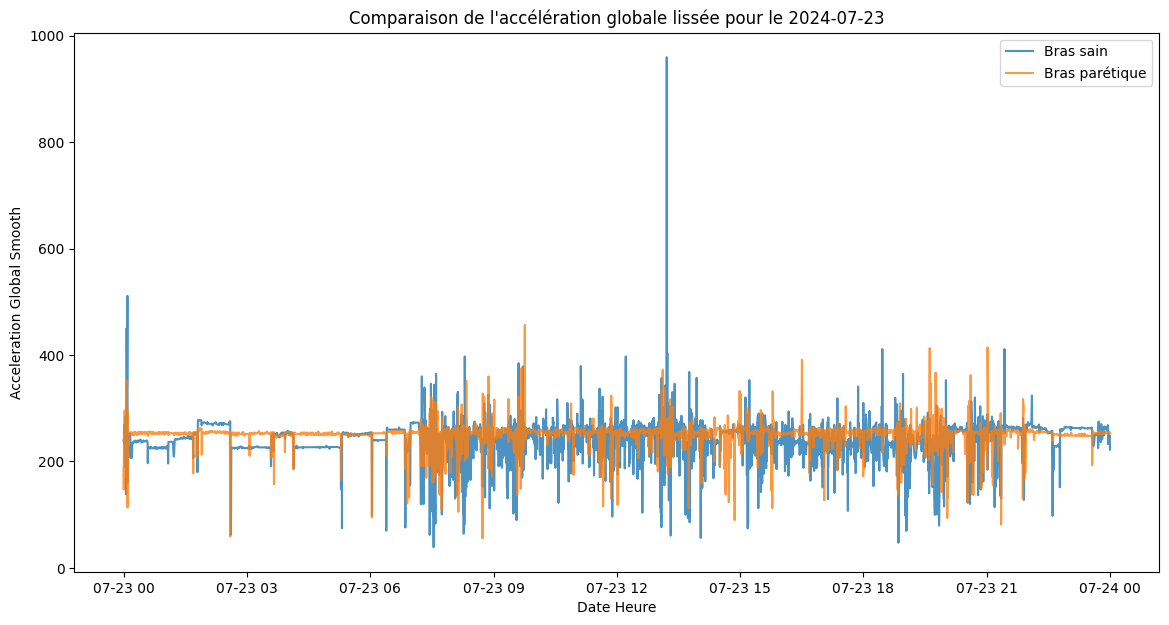

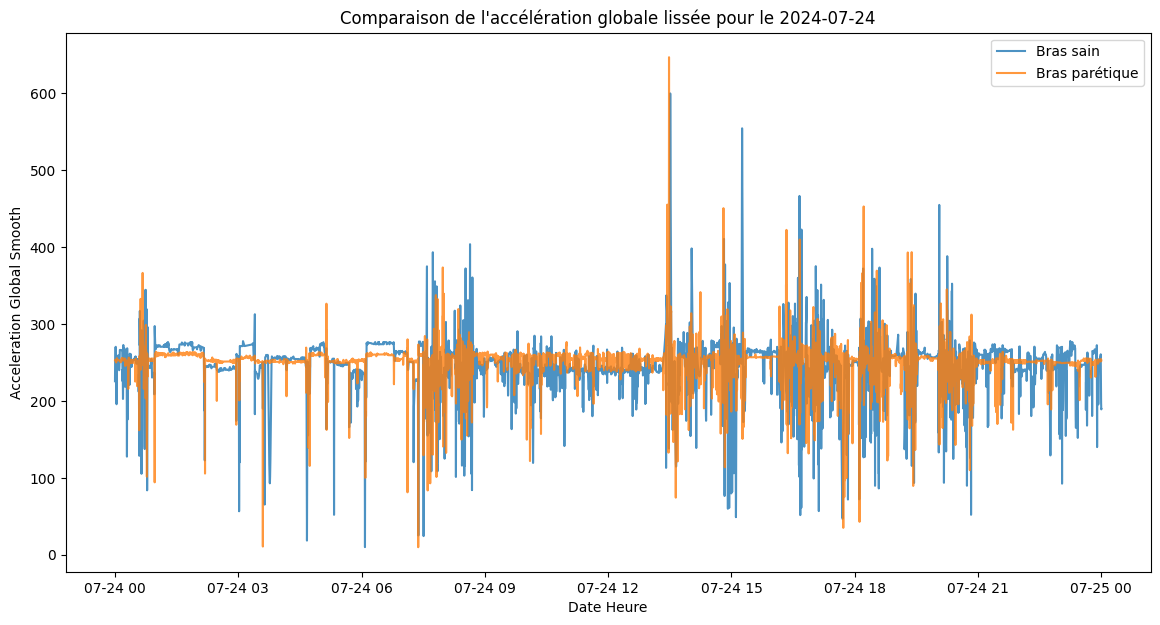

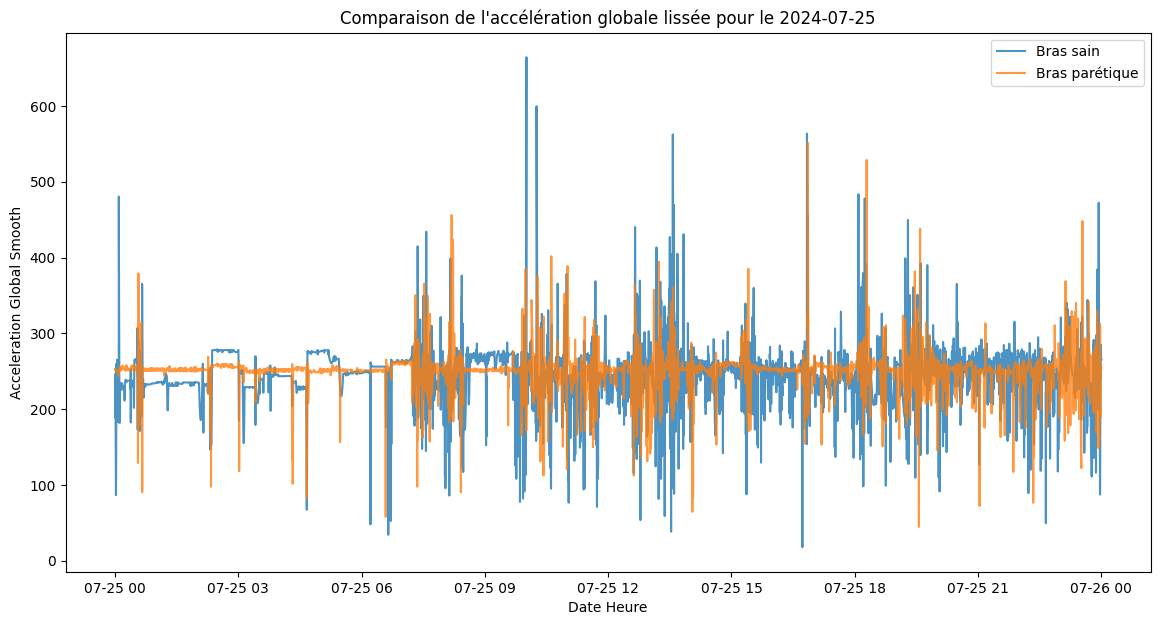

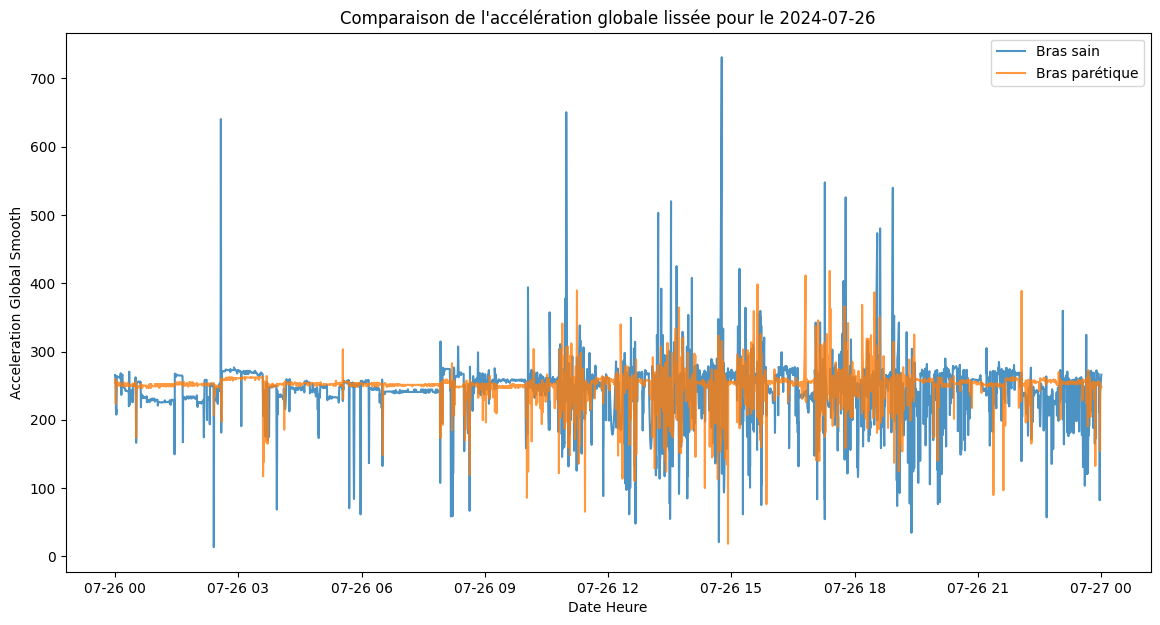

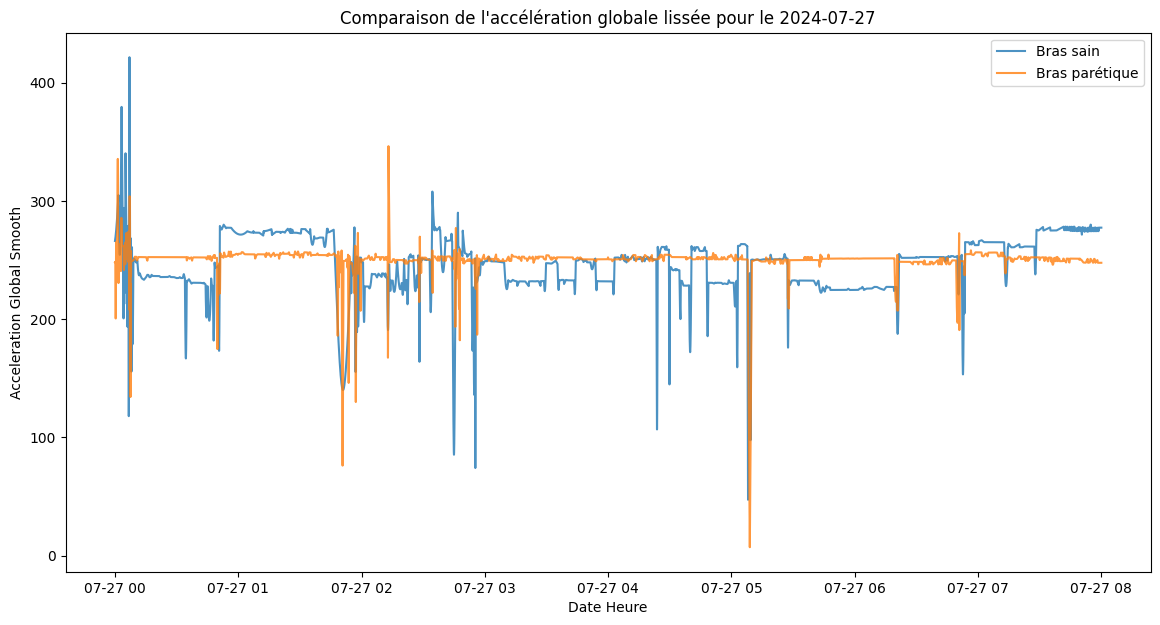

In [13]:
# Calculer l'accélération globale pour df1_interpolated 
df1_interpolated['acceleration_global'] = (df1_interpolated[['X', 'Y', 'Z']]**2).sum(axis=1)**0.5

# Appliquer le filtre Savitzky-Golay sur l'accélération globale pour df1_interpolated
df1_interpolated['acceleration_global_smooth'] = savgol_filter(df1_interpolated['acceleration_global'], window_length=51, polyorder=3)

# Calculer l'accélération globale pour df_interpolated 
df_interpolated['acceleration_global'] = (df_interpolated[['X', 'Y', 'Z']]**2).sum(axis=1)**0.5

# Appliquer le filtre Savitzky-Golay sur l'accélération globale pour df_interpolated
df_interpolated['acceleration_global_smooth'] = savgol_filter(df_interpolated['acceleration_global'], window_length=51, polyorder=3)

# Grouper les données par jour pour df1_interpolated
grouped1 = df1_interpolated.groupby('date')

# Comparer les données jour par jour entre df_interpolated et df1_interpolated
for date, group in grouped:
    group1 = grouped1.get_group(date)
    plt.figure(figsize=(14, 7))
    plt.plot(group['date_heure'], group['acceleration_global_smooth'], label='Bras sain', alpha=0.8)
    plt.plot(group1['date_heure'], group1['acceleration_global_smooth'], label='Bras parétique', alpha=0.8)
    plt.xlabel('Date Heure')
    plt.ylabel('Acceleration Global Smooth')
    plt.title(f'Comparaison de l\'accélération globale lissée pour le {date}')
    plt.legend()
    plt.show()

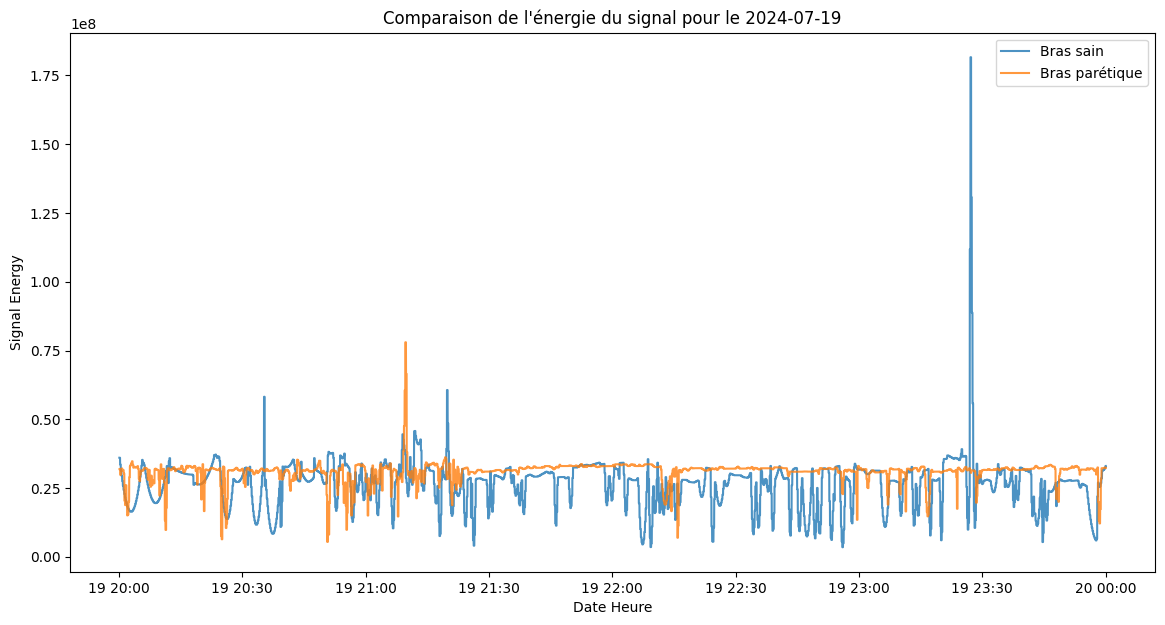

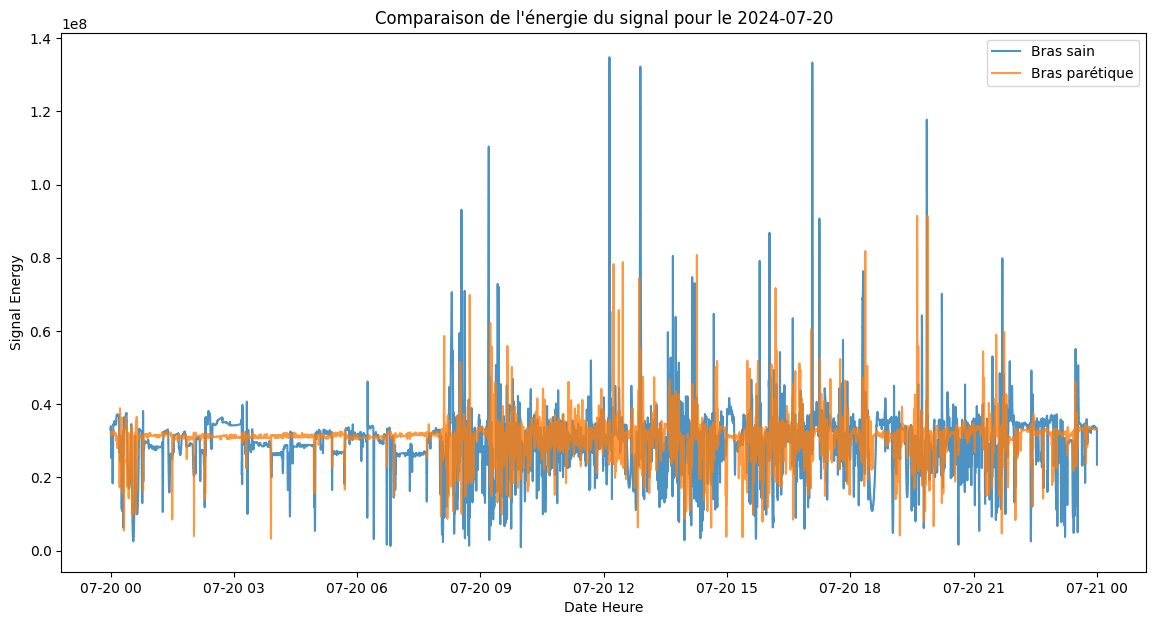

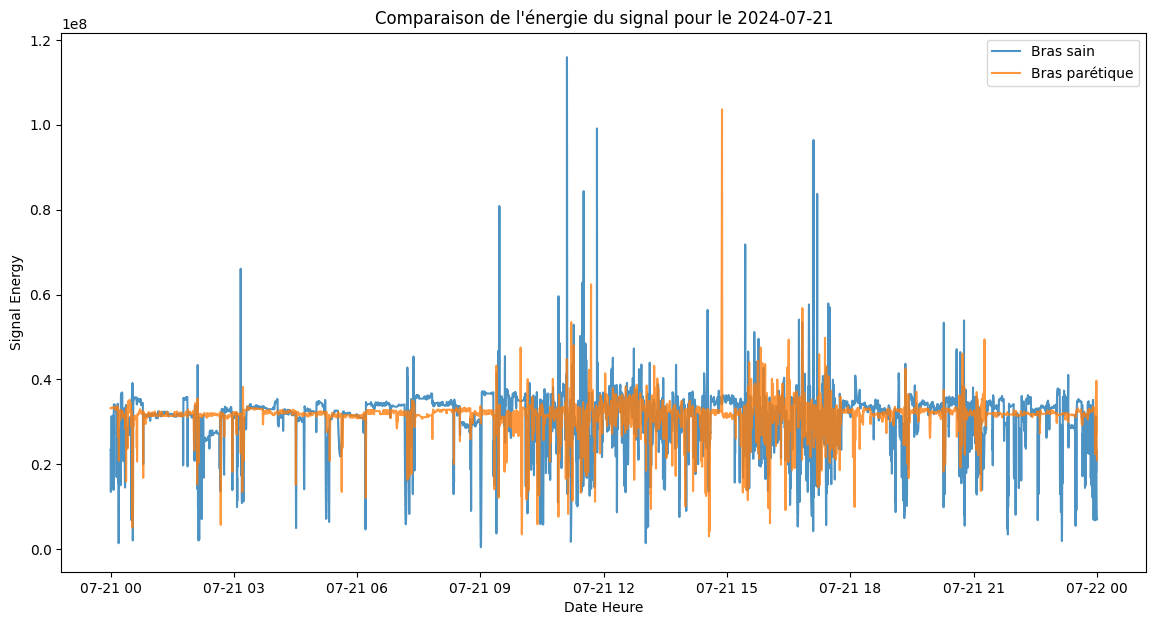

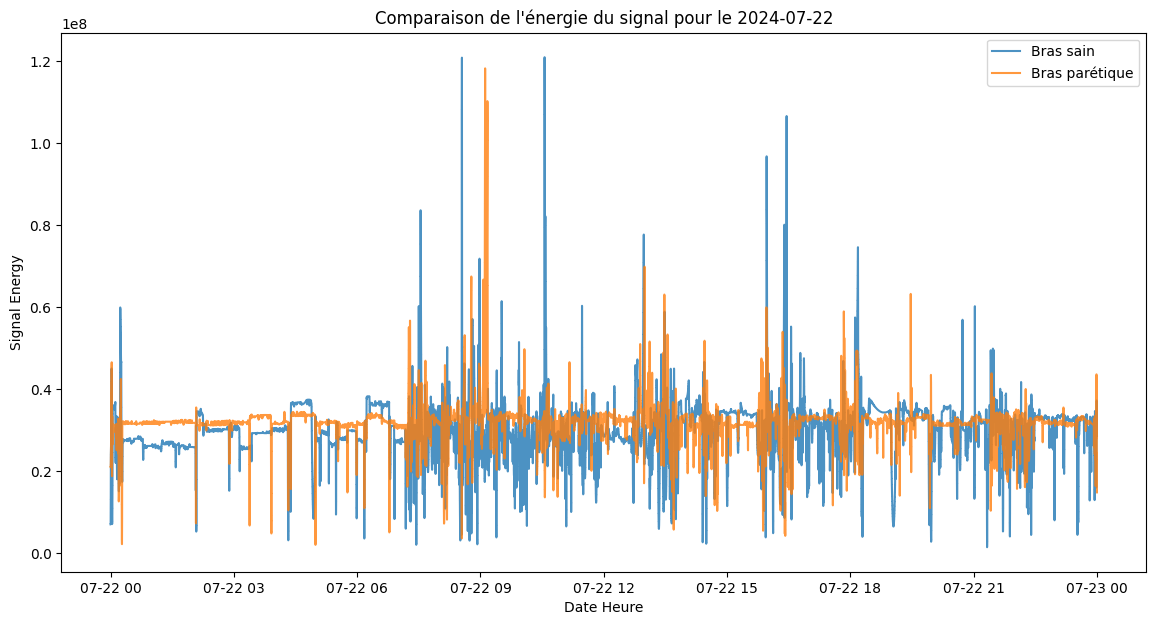

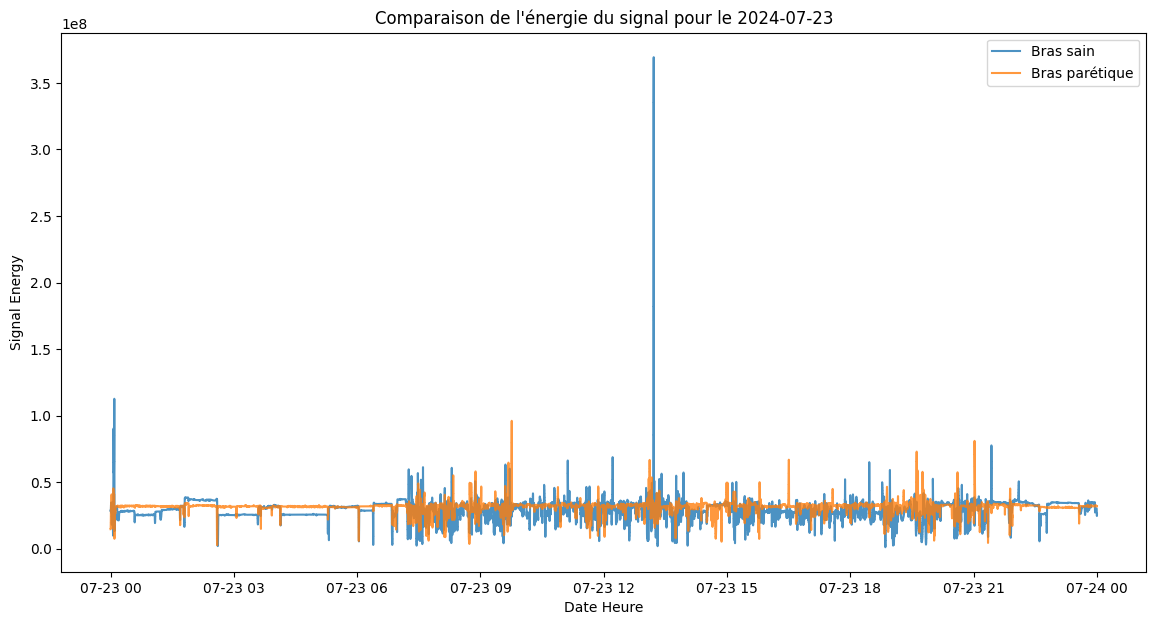

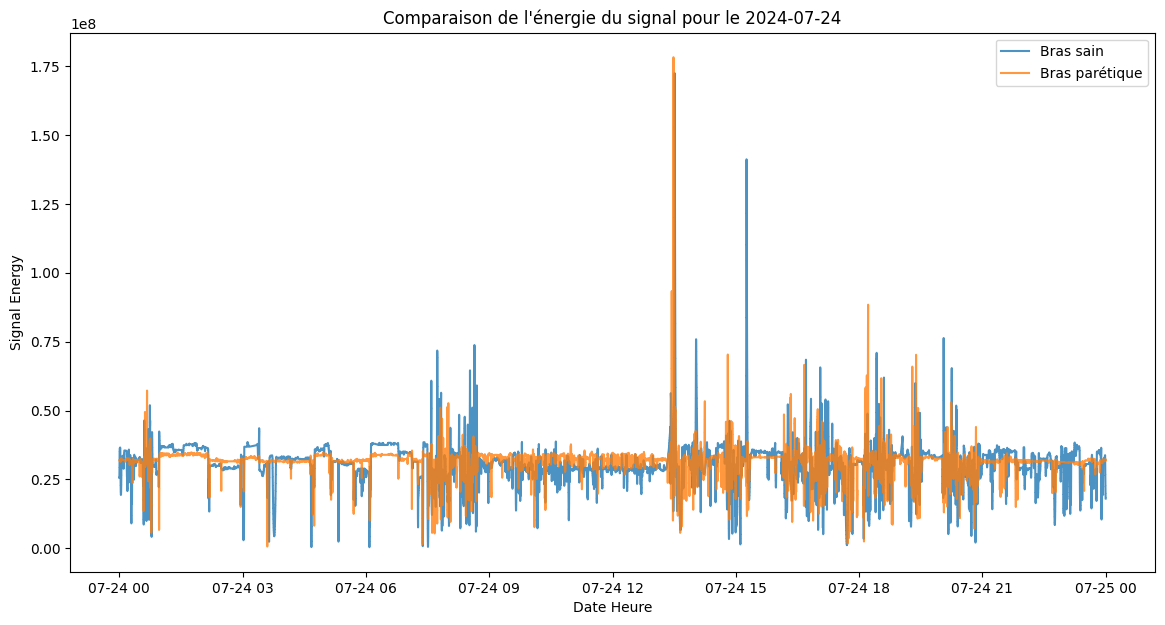

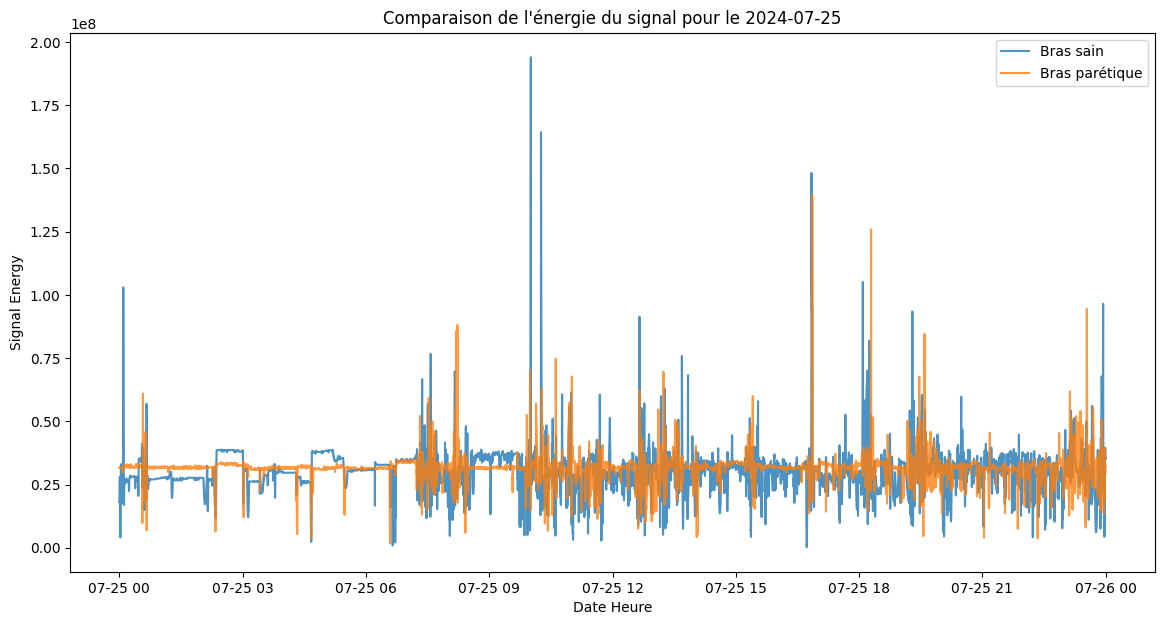

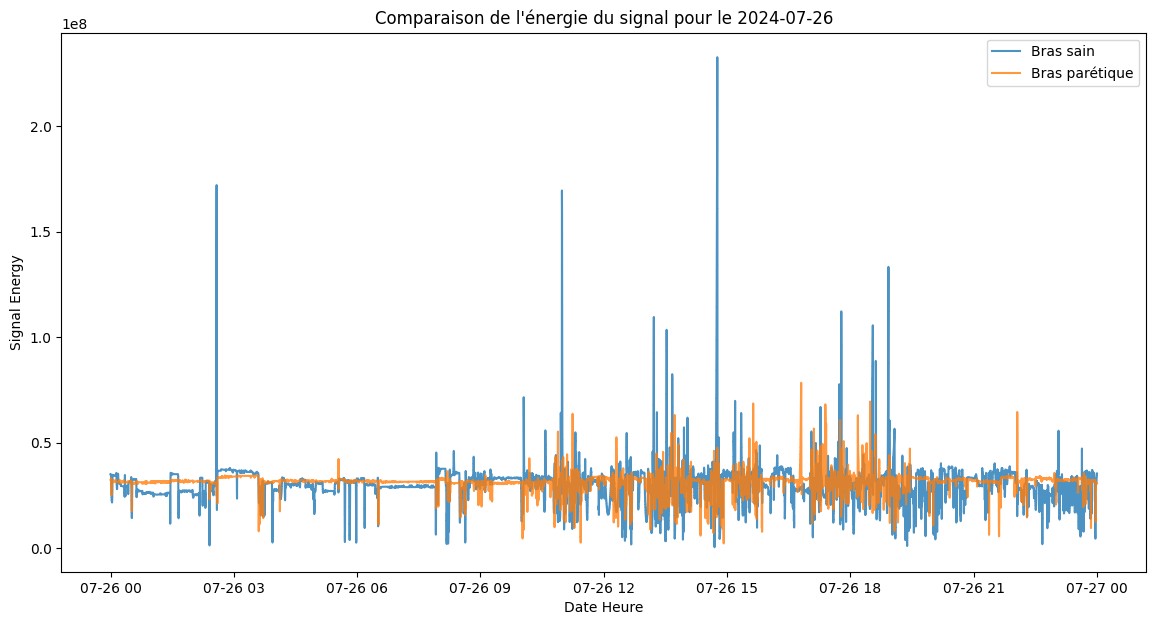

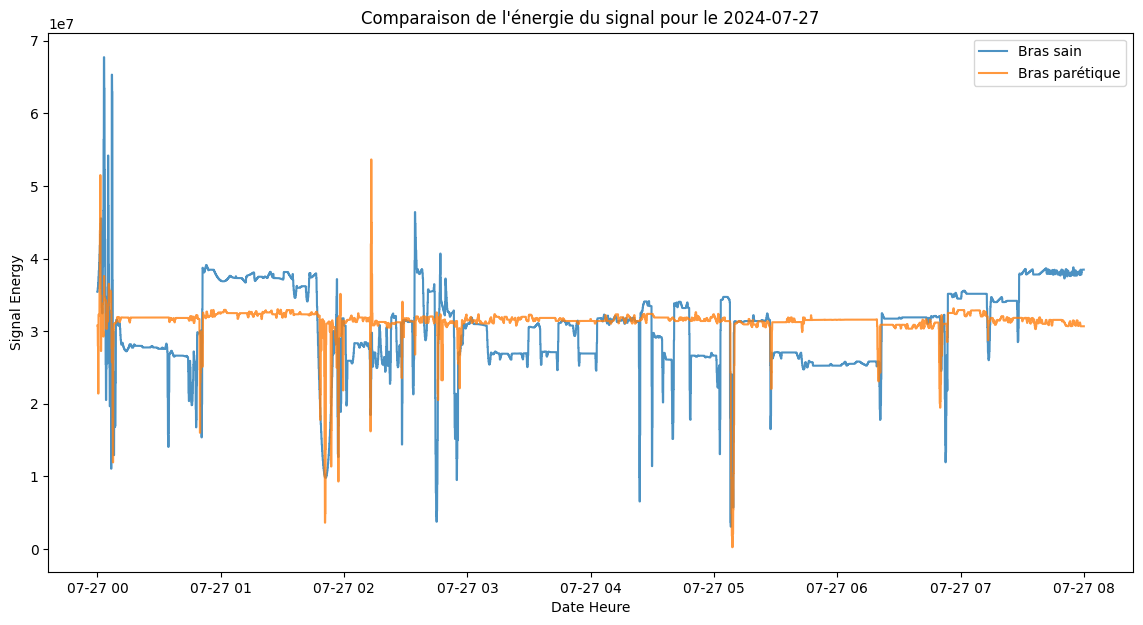

In [16]:
import numpy as np
# Définir la taille de la fenêtre (en nombre d'échantillons)
window_size = 500 

# Calculer l'énergie du signal pour chaque fenêtre
def calculate_signal_energy(df, window_size):
    energy = []
    for i in range(0, len(df) - window_size + 1, window_size):
        window = df['acceleration_global_smooth'].iloc[i:i + window_size]
        energy.append((window ** 2).sum())
    return energy

# Appliquer la fonction pour calculer l'énergie du signal pour df1_interpolated
signal_energy1 = calculate_signal_energy(df1_interpolated, window_size)
signal_energy = calculate_signal_energy(df_interpolated, window_size)

# Ajouter l'énergie du signal au DataFrame df1_interpolated
df1_interpolated['signal_energy'] = np.nan
for i, e in enumerate(signal_energy1):
    df1_interpolated.loc[i * window_size:(i + 1) * window_size - 1, 'signal_energy'] = e

# Ajouter l'énergie du signal au DataFrame df_interpolated
df_interpolated['signal_energy'] = np.nan
for i, e in enumerate(signal_energy):
    df_interpolated.loc[i * window_size:(i + 1) * window_size - 1, 'signal_energy'] = e

# Grouper les données par jour pour df1_interpolated
df1_interpolated['date'] = df1_interpolated['date_heure'].dt.date
grouped1 = df1_interpolated.groupby('date')

# Grouper les données par jour pour df_interpolated
df_interpolated['date'] = df_interpolated['date_heure'].dt.date
grouped = df_interpolated.groupby('date')

# Comparer l'énergie du signal jour par jour entre df_interpolated et df1_interpolated
for date, group in grouped:
    group1 = grouped1.get_group(date)
    plt.figure(figsize=(14, 7))
    plt.plot(group['date_heure'], group['signal_energy'], label='Bras sain', alpha=0.8)
    plt.plot(group1['date_heure'], group1['signal_energy'], label='Bras parétique', alpha=0.8)
    plt.xlabel('Date Heure')
    plt.ylabel('Signal Energy')
    plt.title(f'Comparaison de l\'énergie du signal pour le {date}')
    plt.legend()
    plt.show()